In [214]:
import os

import warnings

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler , StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression , Ridge , Lasso 

from sklearn.cluster import KMeans

from sklearn.metrics import mean_squared_error , r2_score 

warnings.filterwarnings('ignore')

In [48]:
os.listdir()

['employement_rate_aged_15_64.csv',
 'Zips',
 'housing_units_filled.csv',
 'consumer_sentiment_filled.csv',
 'ppi_building_filled.csv',
 'Mortgage_rate_filled.csv',
 'target_filled.csv',
 '.ipynb_checkpoints',
 'GDP.csv',
 'data_exp.ipynb',
 'Pop_Growth_USA.csv',
 'Housing_units.csv',
 'unemployement_rate.csv',
 'data_modelling.ipynb',
 'ppi_trans_filled.csv',
 'new_owned_housing_units_filled.csv',
 'PPI_Transport_warehouse.csv',
 'working_age_pop_filled.csv',
 'consumer_sentiment.csv',
 'unemp_rate_filled.csv',
 'pop_growth_filled.csv',
 'gdp_data_filled.csv',
 'CSUSHPISA.csv',
 'Mortgage_rate.csv',
 'Unemp_rate.csv',
 'New_privately_owned_housing_units.csv',
 'Working_age_population.csv',
 'PPI_Building.csv']

In [49]:
filled_files = [file for file in os.listdir() if file.endswith("_filled.csv")]

In [50]:
filled_files

['housing_units_filled.csv',
 'consumer_sentiment_filled.csv',
 'ppi_building_filled.csv',
 'Mortgage_rate_filled.csv',
 'target_filled.csv',
 'ppi_trans_filled.csv',
 'new_owned_housing_units_filled.csv',
 'working_age_pop_filled.csv',
 'unemp_rate_filled.csv',
 'pop_growth_filled.csv',
 'gdp_data_filled.csv']

### Reading the data from the appropriate CSV files

In [51]:
housing_units = pd.read_csv('housing_units_filled.csv')

consumer_sentiment = pd.read_csv('consumer_sentiment_filled.csv')

ppi_building = pd.read_csv('ppi_building_filled.csv')

mortage_rate = pd.read_csv('Mortgage_rate_filled.csv')

target_var = pd.read_csv('target_filled.csv')

ppi_trans = pd.read_csv('ppi_trans_filled.csv')

newly_owned_houses = pd.read_csv('new_owned_housing_units_filled.csv')

working_age_pop = pd.read_csv('working_age_pop_filled.csv')

unemp_rate = pd.read_csv('unemp_rate_filled.csv')

pop_growth = pd.read_csv('pop_growth_filled.csv')

gdp_data = pd.read_csv('gdp_data_filled.csv')

In [52]:
dataframes = [
    housing_units,
    consumer_sentiment,
    ppi_building,
    mortage_rate,
    ppi_trans,
    newly_owned_houses,
    working_age_pop,
    unemp_rate,
    pop_growth,
    gdp_data,
    target_var  
]

for i in dataframes:
    if 'Unnamed: 0' in i.columns:
        del i['Unnamed: 0']
    else:
        continue

### Renaming the columns from the column names provided by the data provider to something more meaningful

In [53]:
dataframes = {
    'housing_units': housing_units,
    'consumer_sentiment': consumer_sentiment,
    'ppi_building': ppi_building,
    'mortgage_rate': mortage_rate,
    'ppi_trans': ppi_trans,
    'newly_owned_houses': newly_owned_houses,
    'working_age_pop': working_age_pop,
    'unemp_rate': unemp_rate,
    'pop_growth': pop_growth,
    'gdp_data': gdp_data,
    'target_var': target_var
}


for var_name, df in dataframes.items():
    for column in df.columns:
        if column.lower() != 'date':
            df.rename(columns={column: var_name}, inplace=True)

In [55]:
for i in dataframes.values():
    print(f'{i.columns} , {len(i)}')

Index(['DATE', 'housing_units'], dtype='object') , 252
Index(['Date', 'consumer_sentiment'], dtype='object') , 252
Index(['DATE', 'ppi_building'], dtype='object') , 252
Index(['DATE', 'mortgage_rate'], dtype='object') , 260
Index(['DATE', 'ppi_trans'], dtype='object') , 252
Index(['DATE', 'newly_owned_houses'], dtype='object') , 260
Index(['DATE', 'working_age_pop'], dtype='object') , 241
Index(['DATE', 'unemp_rate'], dtype='object') , 252
Index(['DATE', 'pop_growth'], dtype='object') , 241
Index(['DATE', 'gdp_data'], dtype='object') , 252
Index(['DATE', 'target_var'], dtype='object') , 252


### Combining all the individual dataframes into a single dataframe using the merge function (similar to a join operation). The columns contained in these individual dataframes consists of features required for modelling the data. Therefore upon merging the many individual dataframes into a single dataframe , we can proceed with the task of modelling our data.

In [66]:

merged_df = dataframes[0]  

for df in dataframes[1:]:
    merged_df = pd.merge(merged_df, df, on='DATE', how='inner')


feature_columns = [col for col in merged_df.columns if col != 'DATE']
merged_df = merged_df[['DATE'] + feature_columns]


merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])
merged_df['Year'] = merged_df['DATE'].dt.year
merged_df['Month'] = merged_df['DATE'].dt.month

#merged_df.to_csv('preprocessed_dataset.csv')

### No Null values are observed as we had taken care of them during the pre-processing stage

In [71]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                241 non-null    object 
 1   housing_units       241 non-null    float64
 2   consumer_sentiment  241 non-null    float64
 3   ppi_building        241 non-null    float64
 4   mortgage_rate       241 non-null    float64
 5   ppi_trans           241 non-null    float64
 6   newly_owned_houses  241 non-null    float64
 7   working_age_pop     241 non-null    float64
 8   unemp_rate          241 non-null    float64
 9   pop_growth          241 non-null    float64
 10  gdp_data            241 non-null    float64
 11  target_var          241 non-null    float64
dtypes: float64(11), object(1)
memory usage: 22.7+ KB


### As the columns "Date , Year and Month" are not essential as features in the process of modelling the data , we create a new dataframe whose columns do not contain these columns

In [112]:
df1 = merged_df.iloc[: , ~merged_df.columns.isin(['DATE' , 'Year' , 'Month'])]

### Using Seaborn's heatmap plot , we plot the correlation matrix of the features. As you can see there is a strong positive correlation between the GDP and the increase in housing prices , similarly there is also a positive correlation between the increase in housing units and the increase in housing prices. Another observation is that Unemployement rate has a strong negative correlation towards the housing prices.


### It is noted that there is Multicollinearity between certain columns , in the further steps we take measures to overcome this.

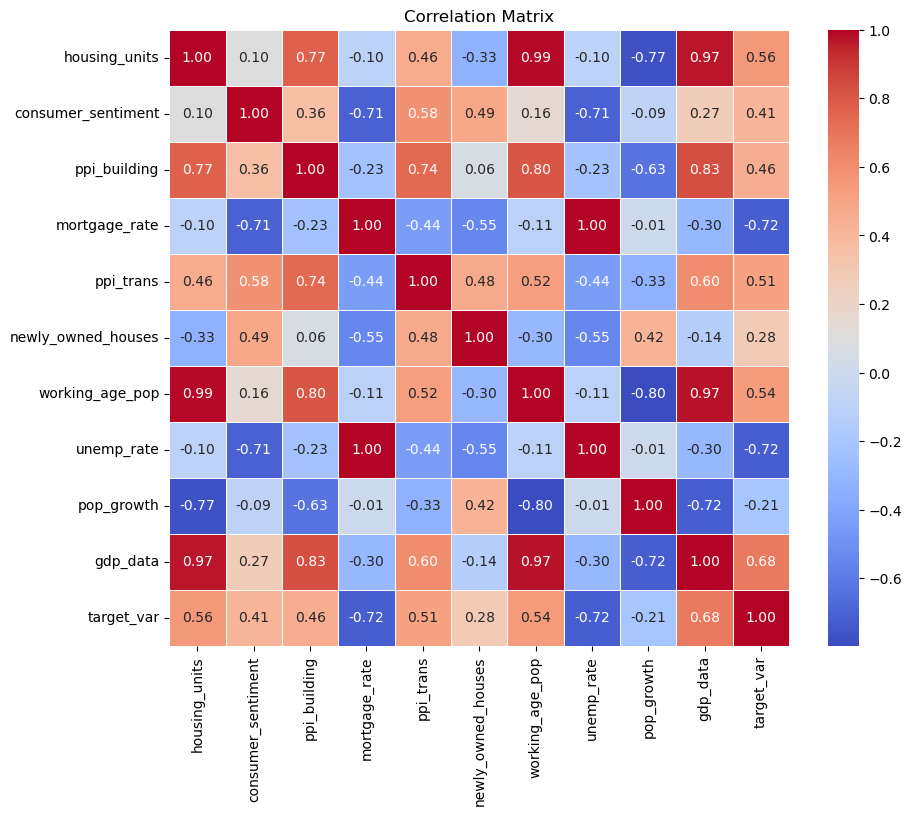

In [226]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(merged_df.iloc[: , ~merged_df.columns.isin(['DATE' , 'Year' , 'Month'])].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### The Dataframe stored in the variable "X" will be used as the training dataset consisting of the feature variables. And the variable "Y" holds the target variable which consists of the "S&P Case-Schiller Home Price Index"



In [144]:
X = df1.iloc[: , ~df1.columns.isin(['DATE' , 'Year' , 'Month'])]

Y = X['target_var']

mm = MinMaxScaler()

for i in X.columns:
    X[i] = mm.fit_transform(X[[i]])


In [155]:
for column_name in X.columns:
    if X[column_name].dtype == 'float64':
        mean_value = X[X[column_name] != 0][column_name].mean()
        X[column_name] = X[column_name].replace(0, mean_value)

### In the following block of code , we are determining outliers present in each column as the values that either exceed "upper quantile + IQR" or fall below "lower quantile - IQR". These values are then replaced by the upper and lower bound values respectively.

In [157]:
lower_quantile = 0.25
upper_quantile = 0.75


IQR = X.quantile(upper_quantile) - X.quantile(lower_quantile)

for column_name in X.columns:
    if X[column_name].dtype == 'float64':
        lower_bound = X[column_name].quantile(lower_quantile) - 1.5 * IQR[column_name]
        upper_bound = X[column_name].quantile(upper_quantile) + 1.5 * IQR[column_name]
        X[column_name] = X[column_name].clip(lower=lower_bound, upper=upper_bound)

### We split the data into training / testing sets using a 0.2 ratio where 0.2 % of the samples present will be used as the test set and the remaining for training. 

In [161]:


xtrain , xtest , ytrain , ytest = train_test_split(X , Y , test_size = 0.2 , shuffle = True , random_state = 1)

In [162]:
print(f'{xtrain.shape} , {ytrain.shape} , {xtest.shape} , {ytest.shape}')

(192, 11) , (192,) , (49, 11) , (49,)


### Here we are using a variation of Linear Regression called "Ridge Regression" which can help in regularization thereby preventing multicollinearity. Ridge regression also prevents overfitting in some cases.

In [164]:
lr = Ridge()

lr.fit(xtrain , ytrain)

Ridge()

In [165]:
ypred = lr.predict(xtest)

### The observed R2 Score is : 0.98 which implies that the regression model explains approximately 98.67% of the variance in the dependent variable based on the independent variables used in this model. We can also suggest that around 98.7% of the variance in home prices is captured by our model.

### The observed Mean Squared is : 0.005 which which indicates that the regression model's predictions are very close to the actual values. i.e It indicates that the model is able to closely approximate the relationships between the independent and dependent variables.

In [227]:
print(f' R2 Score is : {r2_score(ytest , ypred)} \n Mean Squared Error is : {mean_squared_error(ytest , ypred)}')

 R2 Score is : 0.986726188819756 
 Mean Squared Error is : 0.0005102513804534794


In [178]:
pred_df = pd.DataFrame({'Actual':ytest , 'Predicted':ypred})

In [229]:
pred_df.head(10)

,Actual,Predicted
67,0.361724,0.336154
240,0.772705,0.770869
205,0.531836,0.516152
122,0.123169,0.156782
89,0.183591,0.154994
215,0.574040,0.578509
58,0.394305,0.339739
185,0.435256,0.445314
176,0.389666,0.398457
4,0.021244,0.017465


### These coefficients indicate how much each feature contributes to the predicted outcome (target variable).





In [186]:
coefficients = lr.coef_

for i in range(len(coefficients)):
    print(f'The coefficient of {X.columns[i]} is : {coefficients[i]}')

The coefficient of housing_units is 0.14224448012558047
The coefficient of consumer_sentiment is -0.05461131691473055
The coefficient of ppi_building is 0.038168972451910504
The coefficient of mortgage_rate is -0.03364368350684065
The coefficient of ppi_trans is -0.036994217236559754
The coefficient of newly_owned_houses is 0.1426474843513568
The coefficient of working_age_pop is -0.050027512897777494
The coefficient of unemp_rate is -0.0336436835068407
The coefficient of pop_growth is 0.03746030808728215
The coefficient of gdp_data is 0.2349663595332154
The coefficient of target_var is 0.516787704636366


In [188]:
lr.intercept_

-0.03322447470552553